<a href="https://colab.research.google.com/github/Samra-63/AI-ML-Felowship/blob/main/FinalTask_bin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df = df.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'])

imputer = SimpleImputer(strategy='most_frequent')
df[['Age', 'Embarked']] = imputer.fit_transform(df[['Age', 'Embarked']])
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

X = df.drop('Survived', axis=1)
y = df['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [2]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"\n{name} Classification Report:\n", classification_report(y_test, y_pred))
    print("AUC:", roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1]))



Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

AUC: 0.8831402831402833

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179

AUC: 0.8873873873873873

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    acc

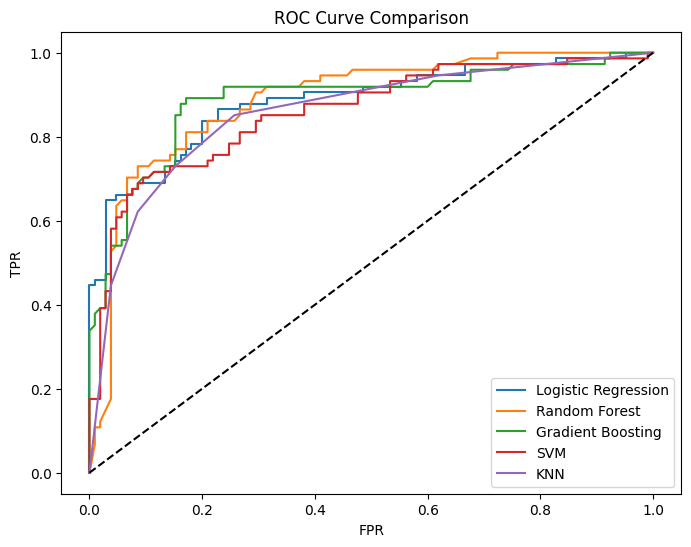

In [3]:

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

def plot_roc_curve(model, X_test, y_test, label):
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    plt.plot(fpr, tpr, label=label)

plt.figure(figsize=(8,6))
for name, model in models.items():
    plot_roc_curve(model, X_test_scaled, y_test, name)
plt.plot([0,1],[0,1],'k--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


In [4]:

import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=50, batch_size=32)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5145 - loss: 0.7029 - val_accuracy: 0.7486 - val_loss: 0.5907
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7249 - loss: 0.5957 - val_accuracy: 0.7542 - val_loss: 0.5251
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7805 - loss: 0.5164 - val_accuracy: 0.7709 - val_loss: 0.4750
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7867 - loss: 0.4696 - val_accuracy: 0.7877 - val_loss: 0.4437
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7970 - loss: 0.4710 - val_accuracy: 0.7933 - val_loss: 0.4271
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8075 - loss: 0.4402 - val_accuracy: 0.7933 - val_loss: 0.4252
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8307 - loss: 0.4124 - val_accuracy: 0.7989 - val_loss: 0.4208
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7941 - loss: 0.4421 - val_accuracy: 0.7989 - val_loss

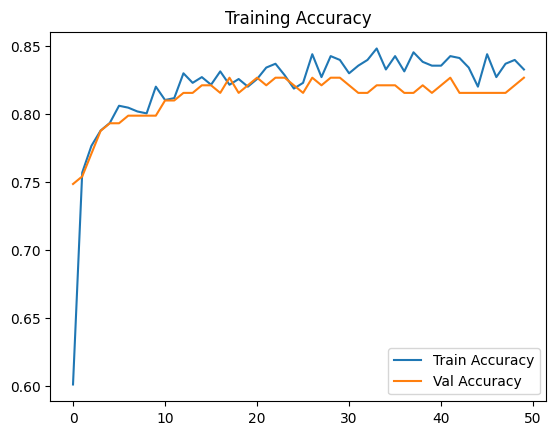

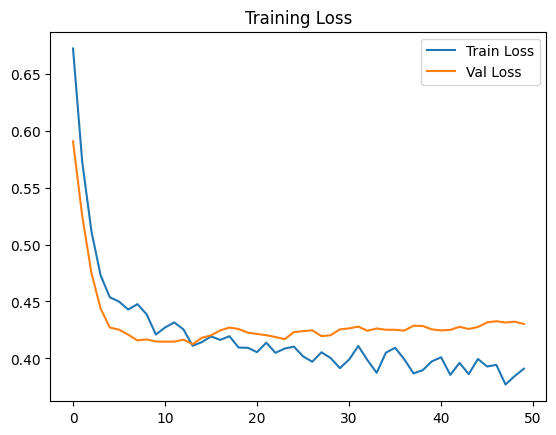

In [5]:

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Training Accuracy")
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Training Loss")
plt.show()


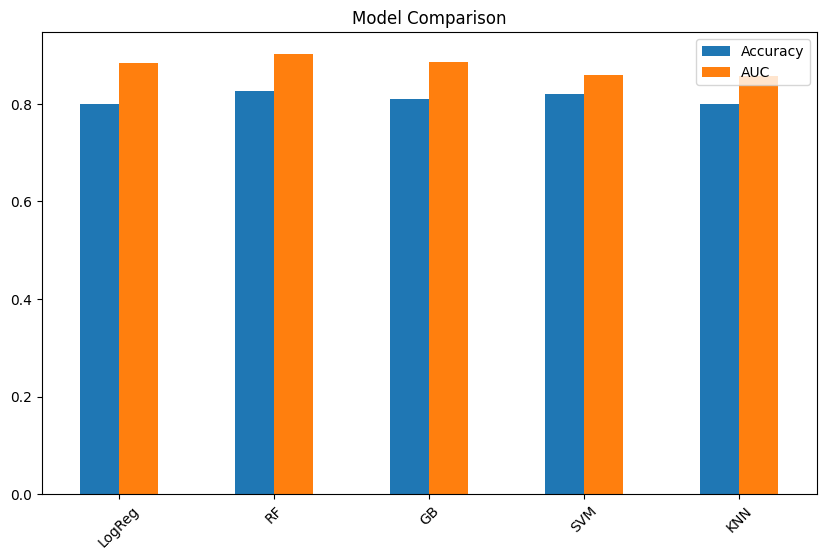

In [26]:

import pandas as pd
results = {}
for name, clf in ml_models.items():
    clf.fit(X_train_scaled, y_train)  # ← This line fits the model
    nn_acc= clf.score(X_test_scaled, y_test)
    nn_auc = roc_auc_score(y_test, clf.predict_proba(X_test_scaled)[:, 1])
    results[name] = [nn_acc, nn_auc]
results_df = pd.DataFrame(results, index=["Accuracy", "AUC"]).T
results_df.plot(kind='bar', figsize=(10, 6), title="Model Comparison")
plt.xticks(rotation=45)
plt.show()
ml_models = {
    'LogReg': LogisticRegression(),
    'RF': RandomForestClassifier(),
    'GB': GradientBoostingClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier()
}
